### Reinforcement Learning - Resource Manager

Version 1.6:

- Change Environment to completely static
    - Do not despawn water and do not spawn new resources
    - Cap resoruce to maximum
    - give Penalty when picking up water and already on max / over max




### Imports

In [1]:
import gym
import numpy as np
from gym.envs.registration import register
import matplotlib.pyplot as plt

### Environment

In [2]:
from environment.ResourceManagerEnvironment_v1_6 import ResourceManagerEnv
from agent.QLearning import QLearningAgent

In [3]:
register(
    id='Resource-Manager-v1-6',
    entry_point='environment.ResourceManagerEnvironment_v1_6:ResourceManagerEnv',
    kwargs={
        'grid_size': 20,           #set to desired grid size
        'window_size': 300,        #set to desired window size
        'num_water_resources': 20,  #set to desired number of water resources
        'render_mode': 'rgb_array'     #set to desired render mode ('human' or 'rgb_array')
    },
    max_episode_steps=500,
)


In [4]:

env = gym.make('Resource-Manager-v1-6')

#Hyperparameters:

learning_rate=0.1
discount_factor=0.9
exploration_prob=1.0
epsilon_decay=0.995
replay_buffer_size=1000
batch_size=32

agent = QLearningAgent(env, learning_rate, discount_factor, exploration_prob, epsilon_decay)
num_episodes = 50

episode_rewards = []
episode_water_resources = []

for episode in range(num_episodes):
    observation = env.reset()
    total_reward = 0

    while True:
        #select action using the Q-learning agent
        action = agent.select_action(observation)
        # Take a step in the environment
        next_observation, reward, done, _, _ = env.step(action)
        total_reward += reward

        #update the Q-table
        agent.update_q_table(observation, action, reward, next_observation)

        observation = next_observation


        if done:
            break

    episode_rewards.append(total_reward)
    episode_water_resources.append(env.water_resource)

    print(f"Episode {episode + 1}, Total Reward: {total_reward}, Total Water Resource: {env.water_resource}")

c:\Users\denni\.conda\envs\tf\lib\site-packages\gym\utils\passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (20, 20)
  logger.warn(
c:\Users\denni\.conda\envs\tf\lib\site-packages\gym\utils\passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
c:\Users\denni\.conda\envs\tf\lib\site-packages\gym\utils\passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
c:\Users\denni\.conda\envs\tf\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a de

Episode 1, Total Reward: 217, Total Water Resource: -0.5
Episode 2, Total Reward: 616, Total Water Resource: 4.5
Episode 3, Total Reward: 1198, Total Water Resource: -0.5
Episode 4, Total Reward: 657, Total Water Resource: -0.5
Episode 5, Total Reward: 563, Total Water Resource: -0.5
Episode 6, Total Reward: 2230, Total Water Resource: -0.5
Episode 7, Total Reward: 719, Total Water Resource: -0.5
Episode 8, Total Reward: 1255, Total Water Resource: -0.5
Episode 9, Total Reward: 1986, Total Water Resource: -0.5
Episode 10, Total Reward: 1637, Total Water Resource: -0.5
Episode 11, Total Reward: 2768, Total Water Resource: -0.5
Episode 12, Total Reward: 1294, Total Water Resource: -0.5
Episode 13, Total Reward: 1032, Total Water Resource: -0.5
Episode 14, Total Reward: 1196, Total Water Resource: -0.5
Episode 15, Total Reward: 1017, Total Water Resource: -0.5
Episode 16, Total Reward: 568, Total Water Resource: -0.5
Episode 17, Total Reward: 1815, Total Water Resource: -0.5
Episode 18, T

In [5]:
#print q table
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
print(agent.q_table)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e

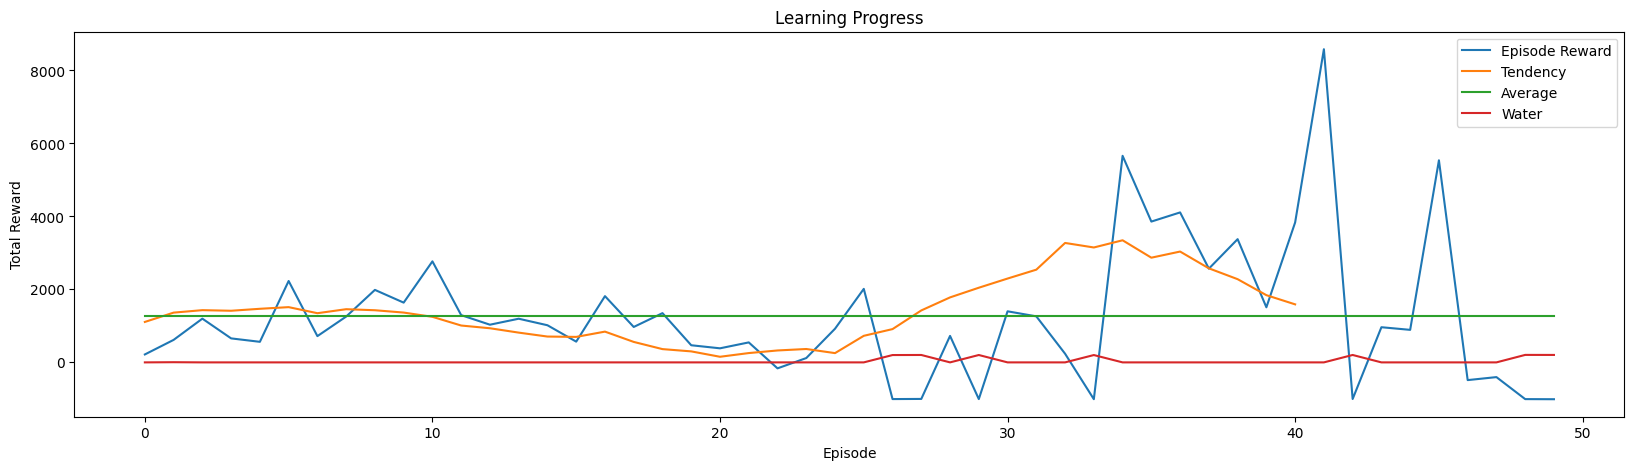

In [6]:
#Plot the total rewards
plt.figure(figsize=(20,5))
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Learning Progress')
#plot tendency curve
plt.plot(np.convolve(episode_rewards, np.ones((10,))/10, mode='valid'))
#plot average
plt.plot(np.ones(len(episode_rewards))*np.mean(episode_rewards))
plt.plot(episode_water_resources)
plt.legend(['Episode Reward', 'Tendency', 'Average', 'Water'])
plt.show()
